In [1]:
from IPython.display import clear_output
!pip install -U fsds_100719
clear_output()
from fsds_100719.imports import *


fsds_1007219  v0.7.22 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


[i] Pandas .iplot() method activated.


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('product_review.csv',encoding= 'unicode_escape')

In [68]:
data.head()

,tweet,product,emotion,text length,scores,compound,comp_score,token_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,"{'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'comp...",-0.6800,Negative emotion,24
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp...",0.9100,Positive emotion,22
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,No emotion toward brand or product,15
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7269,Positive emotion,15
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.6249,Positive emotion,17


In [5]:
data.rename(columns={'tweet_text': 'tweet', 'emotion_in_tweet_is_directed_at': 'product', 'is_there_an_emotion_directed_at_a_brand_or_product':'emotion'}, inplace=True)

In [6]:
data.shape

(9093, 3)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
tweet      9092 non-null object
product    3291 non-null object
emotion    9093 non-null object
dtypes: object(3)
memory usage: 213.2+ KB


In [8]:
data.isnull().sum()

tweet         1
product    5802
emotion       0
dtype: int64

In [9]:
data.fillna('unknown', inplace=True)

In [66]:
data.head()

,tweet,product,emotion,text length,scores,compound,comp_score
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,"{'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'comp...",-0.6800,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp...",0.9100,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,No emotion toward brand or product
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7269,Positive emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.6249,Positive emotion


In [11]:

# data.dropna(inplace=True)

# blanks = []  

# for i,twt,prod,emo in data.itertuples():  
#     if type(twt)==str:            
#         if twt.isspace():         
#             blanks.append(i)     
# data.drop(blanks, inplace=True)

In [12]:
data["tweet"]= data["tweet"].astype(str) 

In [13]:
data['text length'] = data['tweet'].apply(len)

In [67]:
data['token_length'] = [len(x.split(" ")) for x in data.tweet]
max(data.token_length)

33

In [70]:
data.isnull().sum()

tweet           0
product         0
emotion         0
text length     0
scores          0
compound        0
comp_score      0
token_length    0
dtype: int64

In [69]:
data.shape

(8937, 8)

In [16]:
data['emotion'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: emotion, dtype: int64

In [17]:
bad_rows = data['emotion']== "I can't tell"

In [18]:
data = data[~bad_rows]

In [19]:
data['emotion'].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
Name: emotion, dtype: int64

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

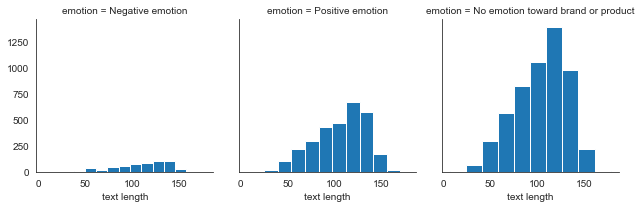

In [21]:
a = sns.FacetGrid(data,col='emotion')
a.map(plt.hist,'text length')

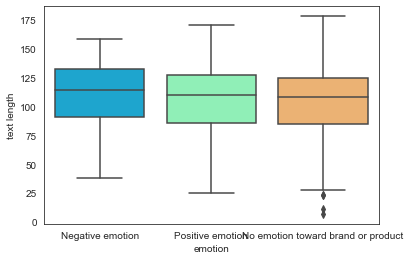

In [22]:
sns.boxplot(x='emotion',y='text length',data=data,palette='rainbow')

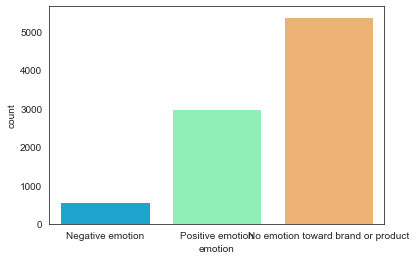

In [23]:
sns.countplot(x='emotion',data=data,palette='rainbow')

In [24]:
from sklearn.model_selection import train_test_split

X = data['tweet']
y = data['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,test_size=0.30, random_state=123)

In [97]:
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

tfidf = TfidfVectorizer(lowercase=True, stop_words='english',
                            tokenizer=tokenizer.tokenize)

svc = LinearSVC(class_weight='balanced')

ROS_pipeline = make_pipeline(tfidf, RandomOverSampler(random_state=123),
                              svc)
SMOTE_pipeline = make_pipeline(tfidf, SMOTE(random_state=123),svc)
ADASYN_pipeline = make_pipeline(tfidf, ADASYN(ratio='minority',random_state=123),svc)

In [98]:
ROS_pipeline.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,...
                                 use_idf=True, vocabulary=None)),
                ('randomoversampler',
                 RandomOverSampler(random_state=123, ratio=None,
                                   return_indices=False,
                                   sampling_strategy='auto')),
                ('linearsvc',
                 

In [99]:
# Form a prediction set
predictions = ROS_pipeline.predict(X_test)

In [100]:
print(metrics.confusion_matrix(y_test,predictions))

[[  66   65   40]
 [  70 1211  336]
 [  26  338  530]]


In [101]:
print(metrics.classification_report(y_test,predictions))

                                    precision    recall  f1-score   support

                  Negative emotion       0.41      0.39      0.40       171
No emotion toward brand or product       0.75      0.75      0.75      1617
                  Positive emotion       0.58      0.59      0.59       894

                          accuracy                           0.67      2682
                         macro avg       0.58      0.58      0.58      2682
                      weighted avg       0.67      0.67      0.67      2682



In [103]:

# testing_tfidf = tfidf.fit_transform(X_train)

# ros = RandomOverSampler(random_state=777)
# X_ROS, y_ROS = ros.fit_sample(testing_tfidf, y_train)

In [112]:
# df = pd.DataFrame(y_ROS)
# df.columns = ['emotion']
# df.head()


,emotion
0,No emotion toward brand or product
1,No emotion toward brand or product
2,Positive emotion
3,No emotion toward brand or product
4,Negative emotion


In [113]:
# df['emotion'].value_counts()

Positive emotion                      3772
Negative emotion                      3772
No emotion toward brand or product    3772
Name: emotion, dtype: int64

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from nltk import TweetTokenizer

tokenizer = TweetTokenizer(preserve_case=False)

text_clf = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words='english',tokenizer=tokenizer.tokenize)),
                     ('clf', LinearSVC(class_weight='balanced'))])

# Feed the training data through the pipeline
text_clf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1c29717208>>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight='balanced', dual=T

In [76]:
# Form a prediction set
predictions = text_clf.predict(X_test)

In [77]:
# Report the confusion matrix
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[  63   69   39]
 [  56 1252  309]
 [  17  355  522]]


In [78]:
# Print a classification report
print(metrics.classification_report(y_test,predictions))

                                    precision    recall  f1-score   support

                  Negative emotion       0.46      0.37      0.41       171
No emotion toward brand or product       0.75      0.77      0.76      1617
                  Positive emotion       0.60      0.58      0.59       894

                          accuracy                           0.68      2682
                         macro avg       0.60      0.58      0.59      2682
                      weighted avg       0.68      0.68      0.68      2682



In [29]:
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

0.6927665920954511


In [30]:
from sklearn.naive_bayes import MultinomialNB

In [79]:
text_mnb = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words='english',tokenizer=tokenizer.tokenize)),
                     ('clf', MultinomialNB())])

# Feed the training data through the pipeline
text_mnb.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1c29717208>>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, cl

In [80]:
# Form a prediction set
predictions = text_mnb.predict(X_test)

In [81]:
print(metrics.confusion_matrix(y_test,predictions))

[[   1  157   13]
 [   0 1563   54]
 [   0  707  187]]


In [82]:
print(metrics.classification_report(y_test,predictions))

                                    precision    recall  f1-score   support

                  Negative emotion       1.00      0.01      0.01       171
No emotion toward brand or product       0.64      0.97      0.77      1617
                  Positive emotion       0.74      0.21      0.33       894

                          accuracy                           0.65      2682
                         macro avg       0.79      0.39      0.37      2682
                      weighted avg       0.70      0.65      0.58      2682



In [35]:
y_test.value_counts()

No emotion toward brand or product    1617
Positive emotion                       894
Negative emotion                       171
Name: emotion, dtype: int64

In [36]:
y_train.value_counts()

No emotion toward brand or product    3772
Positive emotion                      2084
Negative emotion                       399
Name: emotion, dtype: int64

In [37]:
from sklearn.linear_model import SGDClassifier

In [83]:
text_sgdc = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words='english',tokenizer=tokenizer.tokenize)),
                     ('clf', SGDClassifier())])

# Feed the training data through the pipeline
text_sgdc.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
           

In [84]:
# Form a prediction set
predictions = text_sgdc.predict(X_test)

In [85]:
print(metrics.confusion_matrix(y_test,predictions))

[[  46   89   36]
 [  20 1362  235]
 [   6  423  465]]


In [86]:
print(metrics.classification_report(y_test,predictions))

                                    precision    recall  f1-score   support

                  Negative emotion       0.64      0.27      0.38       171
No emotion toward brand or product       0.73      0.84      0.78      1617
                  Positive emotion       0.63      0.52      0.57       894

                          accuracy                           0.70      2682
                         macro avg       0.67      0.54      0.58      2682
                      weighted avg       0.69      0.70      0.68      2682



In [42]:

from sklearn.linear_model import LogisticRegression

In [87]:
text_lr = Pipeline([('tfidf', TfidfVectorizer(lowercase=True, stop_words='english',tokenizer=tokenizer.tokenize)),
                     ('clf', LogisticRegression())])

# Feed the training data through the pipeline
text_lr.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_patt...
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x1c29717208>>,
                                 use_idf=True, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dua

In [88]:
# Form a prediction set
predictions = text_lr.predict(X_test)

In [89]:
print(metrics.confusion_matrix(y_test,predictions))

[[  12  115   44]
 [   6 1422  189]
 [   1  453  440]]


In [90]:
print(metrics.classification_report(y_test,predictions))

                                    precision    recall  f1-score   support

                  Negative emotion       0.63      0.07      0.13       171
No emotion toward brand or product       0.71      0.88      0.79      1617
                  Positive emotion       0.65      0.49      0.56       894

                          accuracy                           0.70      2682
                         macro avg       0.67      0.48      0.49      2682
                      weighted avg       0.69      0.70      0.67      2682



In [47]:
# tfid = TfidfVectorizer()

In [48]:
# tokenizer = TweetTokenizer()

In [49]:
# tfid = TfidfVectorizer(tokenizer=tokenizer.tokenize)

In [50]:
# tweets = tfid.fit_transform(data['tweet'])

In [51]:
# tfid.inverse_transform(tweets)

In [52]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/srn/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [53]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [54]:
data.head()

,tweet,product,emotion,text length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131


In [55]:
data['scores'] = data['tweet'].apply(lambda tweet: sid.polarity_scores(tweet))

In [56]:
data.head()

,tweet,product,emotion,text length,scores
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,"{'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'comp..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp..."


In [57]:

data['compound']= data['scores'].apply(lambda score_dict: score_dict['compound'])

In [58]:
data.head()

,tweet,product,emotion,text length,scores,compound
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,"{'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'comp...",-0.6800
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp...",0.9100
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7269
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.6249


In [59]:
def emotion_p(c):
    if c >=0.2: 
        output = 'Positive emotion'
    elif c <=-0.2:
        output = 'Negative emotion'
    else:
        output = 'No emotion toward brand or product'
    return output
    

In [60]:
emotion_p(0)

'No emotion toward brand or product'

In [61]:
data['comp_score'] = data['compound'].apply(emotion_p)

In [62]:
data.head()

,tweet,product,emotion,text length,scores,compound,comp_score
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,127,"{'neg': 0.203, 'neu': 0.797, 'pos': 0.0, 'comp...",-0.6800,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,139,"{'neg': 0.0, 'neu': 0.576, 'pos': 0.424, 'comp...",0.9100,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,79,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,No emotion toward brand or product
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,82,"{'neg': 0.0, 'neu': 0.663, 'pos': 0.337, 'comp...",0.7269,Positive emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,131,"{'neg': 0.0, 'neu': 0.796, 'pos': 0.204, 'comp...",0.6249,Positive emotion


In [63]:
data['product'].value_counts()

unknown                            5655
iPad                                942
Apple                               659
iPad or iPhone App                  470
Google                              429
iPhone                              296
Other Google product or service     292
Android App                          81
Android                              78
Other Apple product or service       35
Name: product, dtype: int64

In [64]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [65]:
accuracy_score(data['emotion'],data['comp_score'])

0.5490656819961955